In [5]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
# import dataframe_image as dfi
import matplotlib.pyplot as plt
%matplotlib inline

# **Problem 1:**

### File Separation:

In [6]:
# load dataset
train_data = np.loadtxt('../HW2_material/MNISTnumImages5000_balanced.txt', dtype=float)
train_labels = np.loadtxt('../HW2_material/MNISTnumLabels5000_balanced.txt', dtype=float)

In [7]:
def create_file(i):
    currentFile = open('../assets/' + str(i) + '.txt', 'w')
    img = [train_data[key] for (key, label) in enumerate(train_labels) if int(label) == i]
    data = ""
    for i in range(len(img)):
        for j in range(len(img[i])):
            temp_data = str(img[i][j])
            data += temp_data + "\t"
        data += "\n"
    currentFile.write(data)
    currentFile.close()

# this function is used to take 400 label-digits of 0 and 1 to combine into 1 training_dataset
def combine_lst(num_label):
    img = [train_data[key] for (key, label) in enumerate(train_labels) if int(label) == num_label]
    # to keep track of label, we will then add the label to the end of image
    for i in range(len(img)):
        img[i] = np.append(img[i], num_label)
    res = list()
    for i in range(400):
        res.append(img[i])
    return res

training_dataset = combine_lst(0) + combine_lst(1)
random.shuffle(training_dataset)


def make_dataset(num_label): 
    img = [train_data[key] for (key, label) in enumerate(train_labels) if int(label) == num_label]
    for i in range(len(img)):
        img[i] = np.append(img[i], num_label)
    res = list()
    for i in range(400, 500):
        res.append(img[i])
    return res


test_dataset = list()
challenge_dataset = list()


for i in range(10):
    if i == 0 or i == 1:
        test_dataset += make_dataset(i)
    elif i in [n for n in range(2, 10)]:
        challenge_dataset += make_dataset(i)
        
random.shuffle(challenge_dataset)
random.shuffle(test_dataset)

def create_dataset(name, dataset):
    currentFile = open('../assets/' + name + '.txt', 'w')
    data = ""
    for i in range(len(dataset)):
        for j in range(len(dataset[i])):
            temp_data = str(dataset[i][j])
            data += temp_data + "\t"
        data += "\n"
    currentFile.write(data)
    currentFile.close()    

In [8]:
# Create data files
for i in range(10):
    if i == 0 or i == 1 or i == 7 or i == 9:
        create_file(i)
create_dataset('challenge_dataset', challenge_dataset)
create_dataset('test_dataset', test_dataset)
create_dataset('training_dataset', training_dataset)

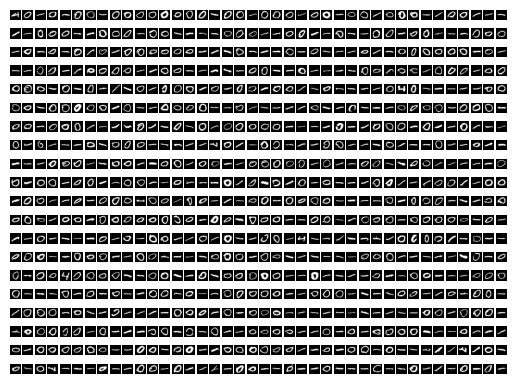

In [9]:
# For testing purpose
file_test = np.loadtxt('../assets/training_dataset.txt', dtype=float)
for i in range(0, 800):
    image = file_test[i][0:784].reshape((28, 28))
    plt.subplot(20, 40, i + 1)
    plt.imshow(image, cmap="gray")
    plt.axis('off')
plt.show()

### Threshold Generator:

In [10]:
train_ds = np.loadtxt('../assets/training_dataset.txt', dtype=float)
test_ds = np.loadtxt('../assets/test_dataset.txt', dtype=float)
challenge_ds = np.loadtxt('../assets/challenge_dataset.txt', dtype=float)

# initialize variables
w = np.random.uniform(0, 0.5, [784])
w_init = w.copy()
learning_rate = 0.1
EPOCH = 40
theta = [i for i in range(41)]

# print(w)
def threshold():
    teaching_rate = 0
    # input_layer = np.dot(w, np.transpose(train_ds[counter][0:784]))
    np.random.shuffle(train_ds)
    
    for t, image in enumerate(train_ds):
        teaching_rate = int(image[784])
        for j, x in enumerate(w):
            x = x + learning_rate * teaching_rate * (train_ds[t][j] - x)
            w[j] = x
# threshold()

In [11]:
for _ in range(EPOCH):
    threshold()
# print(w)

### Confused Matrix

In [12]:
def confused_matrix():
    precision, recall, f1_score, true_pos, false_pos, confuse_value = [], [], [], [], [], [] 
    for i in range(40): # theta is 40
        tp, tn, fp, fn = 0, 0, 0, 0
        for j, iput in enumerate(test_ds):
            y_label = iput[784]
            value_input = np.dot(np.transpose(iput[0:784]), w)
            y_value = 1 if value_input > i else 0
            if y_value == 1:
                if y_label == 1:
                    tp += 1
                else:
                    fp += 1
            elif y_value == 0:
                if y_label == 1:
                    fn += 1
                else:
                    tn += 1
                    
        true_pos.append(tp)
        false_pos.append(fp)
        
        try:
            precision.append(tp / (tp + fp))
            recall.append(tp / (tp + fn))
            f1_score.append((2 * (precision[i] * recall[i])) / (precision[i] + recall[i]))
        except ZeroDivisionError:
            pass
        
        confuse_value.append([i,tp,tn,fp,fn])
        
    return [precision, recall, f1_score, true_pos, false_pos, confuse_value]      

### Precision, Recall, F1 Score, ROC diagram

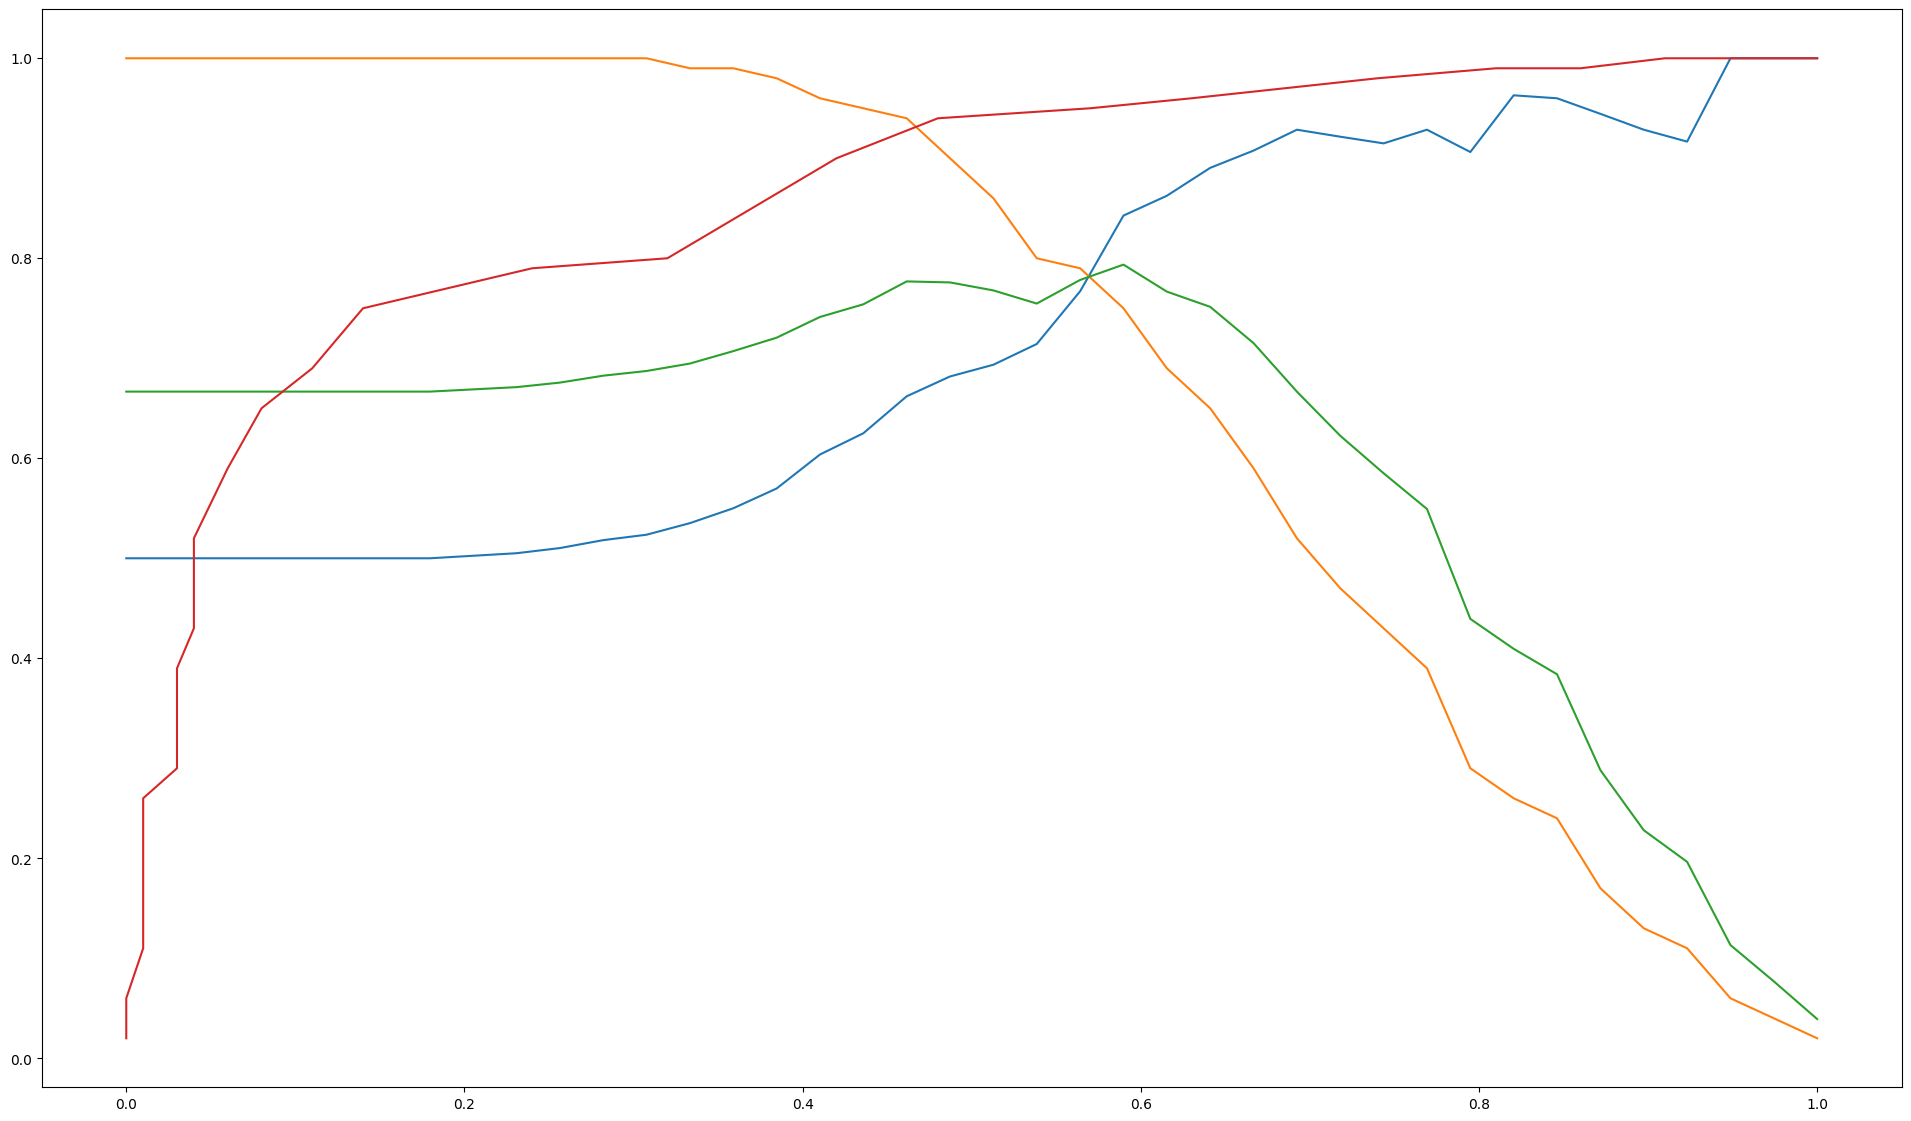

In [31]:
evaluation = confused_matrix()

# print(f'Precision: {evaluation[0]}')
# print(f'Recall: {evaluation[1]}')
# print(f'F1 score: {evaluation[2]}')
# print(f'Confused value: {evaluation[5]}')

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(24, 14))

# precision, recall, f1 score
for i in range(3):
    plt.plot(np.linspace(0, 1, 40), evaluation[i])
    
true_pos = [i/100 for i in evaluation[3]]
false_pos = [i/100 for i in evaluation[4]]


plt.plot(false_pos, true_pos)
plt.savefig('../assets/figure1.png')
plt.show()

### Heat Map

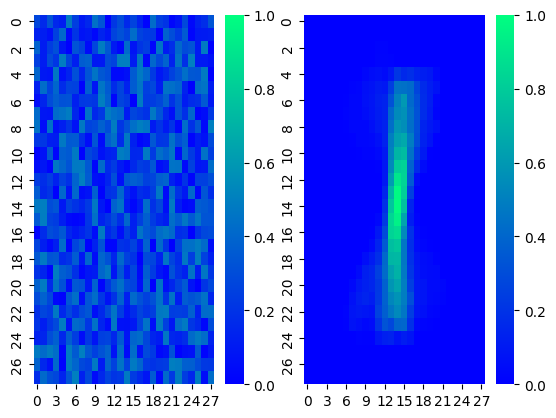

In [23]:
init_w = np.asarray(w_init)
final_w = np.asarray(w)
init_w_img = init_w.reshape(28, 28)
final_w_img = final_w.reshape(28, 28)
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.heatmap(init_w_img, ax=ax1, vmin=0, vmax=1, cmap = 'winter')
sns.heatmap(np.transpose(final_w_img), ax=ax2, vmin=0, vmax=1, cmap = 'winter')
plt.savefig('../assets/figure2.png')
plt.show()

### Optimal Threshold

In [16]:
val_threshold = []
for i in range(len(false_pos)):
    val_threshold.append(true_pos[i] - false_pos[i])

opt_idx = val_threshold.index(max(val_threshold))

def optimal_threshold():
    global opt_idx
    thres_dict = {2 : [0, 0], 3 : [0, 0],
                  4 : [0, 0], 5 : [0, 0],
                  6 : [0, 0], 7 : [0, 0],
                  8 : [0, 0], 9 : [0, 0]}
    for counter, x in enumerate(challenge_ds):
        y_label = int(x[784])
        challenge_input = np.dot(np.transpose(x[0:784]), w)
        y_value = 1 if challenge_input > opt_idx else 0
        if y_value == 0:
            thres_dict[y_label][0] += 1
        elif y_value == 1:
            thres_dict[y_label][1] += 1
    df = pd.DataFrame(thres_dict)
    return df

print(optimal_threshold())

    2   3   4   5   6   7   8   9
0  48  51  85  85  59  67  20  76
1  52  49  15  15  41  33  80  24


# **Problem 2**

### Activation

In [17]:
def activation(iput):
    return 1 if iput > 0 else 0

### Perceptron

In [18]:
w = np.random.uniform(0, 0.5, [784])
bias = 1

def perceptron():
    global bias
    teaching_rate = 0
    
    for i in range(EPOCH):
        error = 0
        np.random.shuffle(train_ds)
        for t, image in enumerate(train_ds):
            teaching_rate = int(image[784])
            s = np.dot(np.transpose(image[0:784]), w) + bias
            y_value = activation(s)
            if y_value != int(teaching_rate):
                error += 1
                print(t)
            for j, x in enumerate(w):
                x = x + learning_rate * teaching_rate * (train_ds[t][j] - x)
                bias = bias + learning_rate * (train_ds[t][j] - x)
                w[j] = x
        print(f'Error is: {error}')

In [19]:
perceptron()

0
2
3
4
6
7
8
9
12
14
16
17
18
21
22
23
24
25
26
28
29
30
33
35
38
40
42
46
47
48
49
51
52
53
56
60
61
62
63
66
67
72
78
79
80
84
91
94
95
96
99
101
103
104
109
112
113
114
115
116
118
120
122
123
124
125
126
127
128
129
130
131
132
137
138
142
144
145
147
149
150
152
155
156
158
159
162
171
173
174
175
179
182
185
186
189
190
191
192
194
197
199
201
203
209
210
217
218
220
221
222
223
224
225
226
229
230
232
233
237
238
240
243
244
245
246
248
253
256
258
260
261
263
264
265
266
267
268
269
271
272
273
275
276
279
280
281
282
285
287
288
289
290
292
293
300
302
306
307
308
310
312
313
315
317
318
319
320
321
322
323
328
330
332
333
335
337
338
339
340
343
346
349
350
353
354
357
358
359
363
365
366
368
369
371
372
375
376
377
378
379
381
382
384
386
388
389
392
393
395
396
397
398
401
405
409
414
417
418
420
421
422
423
425
427
428
430
433
434
435
437
440
442
443
444
446
447
448
449
450
452
457
459
460
462
463
465
466
468
471
476
477
480
483
484
490
491
492
493
495
497
498
499
503
505

### Perceptron Confused Matrix

In [ ]:
def perceptron_conf():
    precision, recall, f1_score, true_pos, false_pos, confuse_value = [], [], [], [], [], []